In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
book_data = pd.read_csv('book.csv')
book_data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
frequent_itemset= apriori(book_data,min_support=0.01,use_colnames=True)
frequent_itemset['length']=frequent_itemset['itemsets'].apply(lambda x : len(x))

In [5]:
frequent_itemset.head()

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1


In [6]:
rules_books= association_rules(frequent_itemset,metric='lift',min_threshold=0.7)
rules_books.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770


In [17]:
rules_books[(rules_books['lift']>2.5) & (rules_books['confidence']>=1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
74,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.0,4.662005,0.029063,inf
86,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.0,4.149378,0.036812,inf
270,"(ItalAtlas, ChildBks)",(RefBks),0.0285,0.2145,0.0285,1.0,4.662005,0.022387,inf
306,"(ChildBks, ItalArt)",(ArtBks),0.0360,0.2410,0.0360,1.0,4.149378,0.027324,inf
475,"(ItalAtlas, YouthBks)",(RefBks),0.0175,0.2145,0.0175,1.0,4.662005,0.013746,inf
...,...,...,...,...,...,...,...,...,...
10983,"(ItalAtlas, ChildBks, ItalCook, ArtBks, ItalAr...",(RefBks),0.0110,0.2145,0.0110,1.0,4.662005,0.008640,inf
10988,"(ItalAtlas, ChildBks, ItalCook, RefBks, ItalArt)","(CookBks, ArtBks)",0.0110,0.1670,0.0110,1.0,5.988024,0.009163,inf
10990,"(ItalAtlas, ChildBks, ItalCook, ArtBks, ItalArt)","(CookBks, RefBks)",0.0110,0.1525,0.0110,1.0,6.557377,0.009322,inf
10992,"(ItalAtlas, ChildBks, ItalCook, ItalArt, CookBks)","(RefBks, ArtBks)",0.0110,0.0895,0.0110,1.0,11.173184,0.010016,inf


Text(0, 0.5, 'confidence')

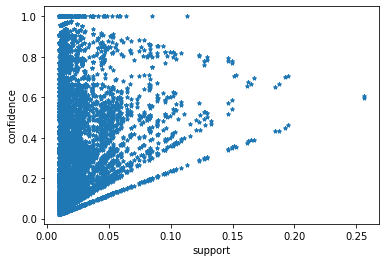

In [16]:
plt.scatter(rules_books['support'],rules_books['confidence'],s =15,marker='*')
plt.xlabel("support")
plt.ylabel("confidence")